Carly Raskin

COMP 4334

HW6

# Pandas DataFrame for storing tweet feed (total 12 points)

Creating the following date frame for storing tweets:

- **climate_feed_df** DataFrame for storing tweets
- **retweeted_status_df** for storing original tweets

In [5]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp

The pickle files retweeted_status_df.pkl and climate_feed.pkl should be in the same folder as this notebook.
If needed, they can also be downloaded by uncommenting the commands below.

In [6]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

In [7]:
#!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pickle files in the same directory as the notebook

In [6]:
retweeted_status_df = pd.read_pickle("retweeted_status_df.pkl")

In [3]:
retweeted_status_df

contributors coordinates                      created_at  \
0              NaN         NaN                             NaN   
1              NaN        None  Sat Feb 09 20:27:45 +0000 2019   
2              NaN        None  Sat Feb 09 23:56:18 +0000 2019   
3              NaN        None  Sat Feb 09 23:34:27 +0000 2019   
4              NaN        None  Sat Feb 09 19:07:56 +0000 2019   
...            ...         ...                             ...   
9994           NaN        None  Sat Feb 09 20:56:39 +0000 2019   
9995           NaN        None  Thu Feb 07 20:27:55 +0000 2019   
9996           NaN        None  Sat Feb 09 18:33:00 +0000 2019   
9997           NaN        None  Fri Feb 08 22:15:50 +0000 2019   
9998           NaN        None  Sat Feb 09 20:41:00 +0000 2019   

                                               entities extended_entities  \
0                                                   NaN               NaN   
1     {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
2     {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
3     {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
4     {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
...                                                 ...               ...   
9994  {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
9995  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9996  {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
9997  {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   
9998  {'hashtags': [], 'user_mentions': [], 'urls': ...               NaN   

      favorite_count favorited   geo            id               id_str  ...  \
0                NaN       NaN   NaN           NaN                  NaN  ...   
1               99.0     False  None  1.094332e+18  1094332044052549633  ...   
2                6.0     False  None  1.094385e+18  1094384528267902977  ...   
3              190.0     False  None  1.094379e+18  1094379028608438272  ...   
4             2905.0     False  None  1.094312e+18  1094311957669265408  ...   
...              ...       ...   ...           ...                  ...  ...   
9994             1.0     False  None  1.094339e+18  1094339317324017665  ...   
9995          3491.0     False  None  1.093607e+18  1093607309606076416  ...   
9996         12586.0     False  None  1.094303e+18  1094303164805799936  ...   
9997          4249.0     False  None  1.093997e+18  1093996855111966720  ...   
9998           166.0     False  None  1.094335e+18  1094335377194799104  ...   

                                          quoted_status  quoted_status_id  \
0                                                   NaN               NaN   
1                                                   NaN               NaN   
2     {'favorited': False, 'favorite_count': 2642, '...      1.093999e+18   
3     {'favorited': False, 'favorite_count': 220, 'i...      1.093932e+18   
4                                                   NaN               NaN   
...                                                 ...               ...   
9994                                                NaN               NaN   
9995                                                NaN               NaN   
9996                                                NaN               NaN   
9997  {'favorited': False, 'favorite_count': 551, 'i...      1.093893e+18   
9998                                                NaN               NaN   

     quoted_status_id_str  retweet_count retweeted scopes  \
0                     NaN            NaN       NaN    NaN   
1                     NaN           81.0     False    NaN   
2     1093998640392220673            5.0     False    NaN   
3     1093931686998487040           31.0     False    NaN   
4                     NaN          599.0     False    NaN   
...                   ...           

In [7]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("climate_feed.pkl")
climate_feed_df

contributors coordinates                      created_at  \
0            None        None  Sun Feb 10 00:17:31 +0000 2019   
1            None        None  Sun Feb 10 00:17:30 +0000 2019   
2            None        None  Sun Feb 10 00:17:26 +0000 2019   
3            None        None  Sun Feb 10 00:17:24 +0000 2019   
4            None        None  Sun Feb 10 00:17:23 +0000 2019   
...           ...         ...                             ...   
9994         None        None  Sat Feb 09 20:57:54 +0000 2019   
9995         None        None  Sat Feb 09 20:57:54 +0000 2019   
9996         None        None  Sat Feb 09 20:57:53 +0000 2019   
9997         None        None  Sat Feb 09 20:57:51 +0000 2019   
9998         None        None  Sat Feb 09 20:57:51 +0000 2019   

                                               entities extended_entities  \
0     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
1     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
2     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
3     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
4     {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
...                                                 ...               ...   
9994  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9995  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9996  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9997  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9998  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   

     favorite_count favorited   geo                   id               id_str  \
0                 0     False  None  1094389867499405313  1094389867499405313   
1                 0     False  None  1094389862193455105  1094389862193455105   
2                 0     False  None  1094389844078485506  1094389844078485506   
3                 0     False  None  1094389837522599936  1094389837522599936   
4                 0     False  None  1094389831419994112  1094389831419994112   
...             ...       ...   ...                  ...                  ...   
9994              0     False  None  1094339630500012033  1094339630500012033   
9995              0     False  None  1094339629107400704  1094339629107400704   
9996              0     False  None  1094339627316641794  1094339627316641794   
9997              0     False  None  1094339619569557504  1094339619569557504   
9998              0     False  None  1094339617581481984  1094339617581481984   

      ... quoted_status     quoted_status_id quoted_status_id_str  \
0     ...           NaN                  NaN                  NaN   
1     ...           NaN                  NaN                  NaN   
2     ...           NaN  1093998640392220673  1093998640392220673   
3     ...           NaN  1093931686998487040  1093931686998487040   
4     ...           NaN                  NaN                  NaN   
...   ...           ...                  ...                  ...   
9994  ...           NaN                  NaN                  NaN   
9995  ...           NaN                  NaN                  NaN   
9996  ...           NaN                  NaN                  NaN   
9997  ...           NaN  1093893115633647616  1093893115633647616   
9998  ...           NaN                  NaN                  NaN   

     retweet_count retweeted retweeted_status  \
0                0     False              NaN   
1               81     False     1.094332e+18   
2                5     False     1.094385e+18   
3               31     False     1.094379e+18   
4              599     False     1.094312e+18   
...            ...       ...              ...   
9994             1     False     1.094339e+18   
9995           482     False     1.093607e+18   
9996          2801     False     1.094303e+18   
9997   

Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [12]:
climate_feed_df.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) Replace None with nan in climate_feed_df. Also display some random rows.


In [8]:
# write code here

# replace will only work if I am doing it on object type columns, so I need to isolate these columns
object_columns = climate_feed_df.select_dtypes(include=['object']).columns
# print(object_columns)

for column in object_columns:
    climate_feed_df[column].replace('None', np.nan, inplace=True)

print(climate_feed_df.sample(5))

      contributors coordinates                      created_at  \
5144           NaN         NaN  Sat Feb 09 22:33:16 +0000 2019   
4358           NaN         NaN  Sat Feb 09 22:51:39 +0000 2019   
9523           NaN         NaN  Sat Feb 09 21:07:05 +0000 2019   
7485           NaN         NaN  Sat Feb 09 21:46:48 +0000 2019   
8076           NaN         NaN  Sat Feb 09 21:34:37 +0000 2019   

                                               entities extended_entities  \
5144  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
4358  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
9523  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
7485  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
8076  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   

     favorite_count favorited  geo                   id               id_str  \
5144              0     False  NaN  1094363630164824064  109

Working with only selected attributes.

In [13]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [14]:
climate_feed_df.sample(10)

created_at  \
5079  Sat Feb 09 22:34:25 +0000 2019   
5237  Sat Feb 09 22:31:28 +0000 2019   
7521  Sat Feb 09 21:45:58 +0000 2019   
1060  Sat Feb 09 23:56:33 +0000 2019   
5095  Sat Feb 09 22:34:05 +0000 2019   
8365  Sat Feb 09 21:28:40 +0000 2019   
6611  Sat Feb 09 22:03:59 +0000 2019   
5916  Sat Feb 09 22:18:09 +0000 2019   
5918  Sat Feb 09 22:18:08 +0000 2019   
806   Sun Feb 10 00:01:21 +0000 2019   

                                               entities  retweeted_status  \
5079  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
5237  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
7521  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
1060  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094303e+18   
5095  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094363e+18   
8365  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
6611  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094333e+18   
5916  {'hashtags': [], 'user_mentions': [{'id_str': ...               NaN   
5918  {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094042e+18   
806   {'hashtags': [], 'user_mentions': [{'id_str': ...      1.094381e+18   

     truncated              user_id  \
5079     False           2722490281   
5237      True           3243320402   
7521     False             39563206   
1060     False           2497667216   
5095     False            239378797   
8365      True            389898139   
6611     False  1058765949766119425   
5916      True  1012185778166919168   
5918     False           2855400744   
806      False            416786665   

                                                   text  
5079  @BelTel A flat earth believing, climate change...  
5237  @NotEvenMauricio @JDSEstoril @ShellenbergerMD ...  
7521  @SenMarkey You have my support and vote @SenMa...  
1060  RT @SenSanders: President Trump believes we sh...  
5095  RT @CBCNews: Canadian-led research has found t...  
8365  @EnvDefenseFund EDF rightly states Human-produ...  
6611  RT @nowthisnews: More than half the world's oc...  
5916  You know with the new @MikeBloomberg bribery o...  
5918  RT @SallyLawry: The LNP already have the votes...  
806   RT @ChrisJZullo: @realDonaldTrump Climate chan...

# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [9]:
# write code here
climate_feed_df['created_at'] = pd.to_datetime(climate_feed_df['created_at'])
climate_feed_df['truncated'] = climate_feed_df['truncated'].astype(bool)

Checking datatype again

In [19]:
climate_feed_df.dtypes

contributors                             float64
coordinates                               object
created_at                   datetime64[ns, UTC]
entities                                  object
extended_entities                         object
favorite_count                            object
favorited                                 object
geo                                       object
id                                        object
id_str                                    object
in_reply_to_screen_name                   object
in_reply_to_status_id                     object
in_reply_to_status_id_str                 object
in_reply_to_user_id                       object
in_reply_to_user_id_str                   object
is_quote_status                           object
lang                                      object
metadata                                  object
place                                     object
possibly_sensitive                        object
quoted_status       

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [10]:
# write code here

num_nan = climate_feed_df.isna().sum()
print("nan count by column")
print(num_nan)

nan count by column
contributors                 9999
coordinates                  9996
created_at                      0
entities                        0
extended_entities            9819
favorite_count                  0
favorited                       0
geo                          9996
id                              0
id_str                          0
in_reply_to_screen_name      8540
in_reply_to_status_id        8609
in_reply_to_status_id_str    8609
in_reply_to_user_id          8540
in_reply_to_user_id_str      8540
is_quote_status                 0
lang                            0
metadata                        0
place                        9900
possibly_sensitive           7868
quoted_status                9773
quoted_status_id             9177
quoted_status_id_str         9177
retweet_count                   0
retweeted                       0
retweeted_status             2690
source                          0
text                            0
truncated                   

We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a column named hashtags. Values in this columns should be comma separated values of **text** attribute in **hashtags**  value.
 - Create a column named user_mentions. Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [11]:
# write code here
import ast

def entities_to_dict(entities_string):
    entities_dict = ast.literal_eval(entities_string)
    hashtags = ['#'+h['text'] for h in entities_dict.get('hashtags', [])]
    if hashtags:
        hashtags = ','.join(hashtags)
    else:
        hashtags = np.nan
    user_mentions = [u['name'] for u in entities_dict.get('user_mentions', [])]
    if user_mentions:
        user_mentions = ','.join(user_mentions)
    else:
        user_mentions = np.nan
    return hashtags, user_mentions

climate_feed_df[['hashtags', 'user_mentions']] = climate_feed_df['entities'].apply(entities_to_dict).apply(pd.Series)

# print(climate_feed_df[['hashtags', 'user_mentions']])
print(climate_feed_df.sample(10))


      contributors coordinates                created_at  \
7610           NaN         NaN 2019-02-09 21:44:23+00:00   
7986           NaN         NaN 2019-02-09 21:36:21+00:00   
925            NaN         NaN 2019-02-09 23:59:09+00:00   
1604           NaN         NaN 2019-02-09 23:46:29+00:00   
575            NaN         NaN 2019-02-10 00:05:39+00:00   
6766           NaN         NaN 2019-02-09 22:00:50+00:00   
8834           NaN         NaN 2019-02-09 21:19:33+00:00   
2617           NaN         NaN 2019-02-09 23:27:45+00:00   
5757           NaN         NaN 2019-02-09 22:21:36+00:00   
4064           NaN         NaN 2019-02-09 22:58:16+00:00   

                                               entities  \
7610  {'hashtags': [], 'user_mentions': [{'id_str': ...   
7986  {'hashtags': [], 'user_mentions': [], 'urls': ...   
925   {'hashtags': [{'indices': [118, 135], 'text': ...   
1604  {'hashtags': [], 'user_mentions': [{'id_str': ...   
575   {'hashtags': [], 'user_mentions': [{'i

# Cleaning tweets

Let's see some random tweets

In [12]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(100)

5441      RT @bitterlily22: @AOC @JStein_WaPo I have the Brooklyn Bridge for sale! Want to buy it? That's about how we feel about your climate change…
679                                                                      RT @XRSault: Grown men being one upped by children... https://t.co/ERhJfA3kRv
1287                                           Harrison Ford warns of apocalyptic catastrophe from climate change - Daily Mail https://t.co/nZVcDEHEPv
4255      RT @GreenCampusNUIG: Some interesting topics discussed here today at @DublinCityUni Climate Challenge: Policy, Media and Society. How can w…
4575    RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
                                                                             ...                                                                      
5509       RT @s_colenbrander: Transport infrastructure locks in the carbon intensity and clim

**Example of tweet not truncated**

In [35]:
climate_feed_df['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [36]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [15]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [16]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(3.5 points, 1 for the use of requests and text extraction from right html element+.5+1+1 for the rest.) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

Option 1. This question frequently presents a challenge to students. If needed, please use the provided pickle file.
Just uncomment the following cell to import the dataframe.

Option 2. Use twitter API. For this you will need to look at hw 4 to set up the connection and use the "2/tweets/{id}" endpoint.

Either option will work. You will still need to do the cleaning portion of the question for either option you choose.

This is also the documentation link for the api call:
https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/api-reference/get-tweets-id

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

Absolutely can't do option 2 since the HW4 had to be rewritten considering that twitter API feature is no longer available (I believe that Elon is trying to now charge people to use them and thus is overhauling the entire system).

In [13]:
import pickle
with open('q5_dataframe.pkl', 'rb') as f:
    climate_feed_df = pickle.loads(f.read())
climate_feed_df
# print(climate_feed_df.dtypes)

created_at  \
0    2019-02-10 00:17:31   
1    2019-02-10 00:17:30   
2    2019-02-10 00:17:26   
3    2019-02-10 00:17:24   
4    2019-02-10 00:17:23   
...                  ...   
9994 2019-02-09 20:57:54   
9995 2019-02-09 20:57:54   
9996 2019-02-09 20:57:53   
9997 2019-02-09 20:57:51   
9998 2019-02-09 20:57:51   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             entities  \
0                                                                                                                                                                                                                       {'hashtags': [], 'user_mentions': [{'id_str': '48117116', 'name': 'Steve King', 'screen_name': 'SteveKingIA', 'indices': [1, 13], 'id': 48117116}], 'urls': [{'indices': [117, 140], 'url': 'https://t.co/J1CcrQZkB2', 'display_url': 'twitter.com/i/web/status/1…', 'expanded_url': 'https://twitter.com/i/web/status/1094389867499405313'}], 'symbols': []}   
1                                                                                                                                                                                                                                                                                                                                                                                                 {'hashtags': [], 'user_mentions': [{'id_str': '16777464', 'name': 'Rob Oakeshott', 'screen_name': 'RobOakeshott1', 'indices': [3, 17], 'id': 16777464}], 'urls': [], 'symbols': []}   
2                                                                                                                                                                                         {'hashtags': [], 'user_mentions': [{'id_str': '850130990706151428', 'name': 'Suze Michelini', 'screen_name': 'emilia_suze', 'indices': [3, 15], 'id': 850130990706151428}], 'urls': [{'indices': [105, 128], 'url': 'https://t.co/HWjCJGhQIx', 'display_url': 'twitter.com/LeoDiCaprio/st…', 'expanded_url': 'https://twitter.com/LeoDiCaprio/status/1093998640392220673'}], 'symbols': []}   
3                                                                                                                                                                                                                                                                                                                                                                            {'hashtags': [], 'user_mentions': [{'id_str': '753005970318626816', 'name': 'Chad Vigorous', 'screen_name': 'PrettyBadLefty', 'indices': [3, 18], 'id': 753005970318626816}], 'urls': [], 'symbols': []}   
4                                                                                                                                                                                                                                                                                                                                                                                        {'hashtags': [], 'user_mentions': [{'id_str': '1634248890', 'name': 'Ken Klippenstein', 'screen_name': 'kenklippenstein', 'indices': [3, 19], 'id': 1634248890}], 'urls': [], 'symbols': []}   
...                                                                                                                                                                                                                                                                    

In [14]:
# Write code here
# cleaning up the data

import re
def clean_tweet(tweet):
    # gotta account for if the original_tweet column is empty or a nan
    if tweet == "None" or pd.isna(tweet):
        return None

    tweet = re.sub(r'\n+', '.', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\w+:?', '', tweet)
    return tweet

climate_feed_df['original_tweet_text'] = climate_feed_df['original_tweet_text'].apply(clean_tweet)
print(climate_feed_df.sample(10))


              created_at  \
4330 2019-02-09 22:52:18   
8305 2019-02-09 21:29:56   
8127 2019-02-09 21:33:31   
2019 2019-02-09 23:38:55   
8613 2019-02-09 21:23:59   
6885 2019-02-09 21:58:51   
3878 2019-02-09 23:01:41   
2072 2019-02-09 23:37:48   
2112 2019-02-09 23:36:59   
1020 2019-02-09 23:57:15   

                                                                                                                                                                                                                                                                                                                                                                       entities  \
4330                                   {'hashtags': [], 'user_mentions': [{'id_str': '824361794781245441', 'name': 'Jim Eckmage', 'screen_name': 'JimEckmage', 'indices': [3, 14], 'id': 824361794781245441}, {'id_str': '592824266', 'name': 'Mercedes-Benz Peterborough', 'screen_name': 'MBPeterborough', 'indices': [29, 44]

# Q 6(point 1= .5+.5) Remove all the references  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [15]:
# write code here
# basically doing the same as before just in a different column
def clean_text(text):
    text = re.sub(r'RT\s', '', text) # remove RT and following whitespace
    text = re.sub(r'@\w+:?', '', text) # remove @username: or @username
    text = re.sub(r'http\S+', '', text) # remove URLs
    return text

climate_feed_df['text'] = climate_feed_df['text'].apply(clean_text)
print(climate_feed_df.sample(10))


              created_at  \
5518 2019-02-09 22:26:06   
4765 2019-02-09 22:41:25   
6153 2019-02-09 22:13:18   
6571 2019-02-09 22:04:42   
4141 2019-02-09 22:56:49   
7898 2019-02-09 21:38:25   
1451 2019-02-09 23:49:23   
2807 2019-02-09 23:24:34   
4049 2019-02-09 22:58:34   
7185 2019-02-09 21:52:13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             entities  \
5518  {'hashtags': [], 'user_mentions': [{'id_str': '864663235923820545', 'name': 'Patti Olivier..#Kamala2020', 'screen_na

# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words don't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [16]:
# write code here

def get_final_tweet_text(row):
    # if there is an nan in original tweet text
    if row['original_tweet_text'] == None:
        return row['text']
    else:
        if row['original_tweet_text'].startswith(row['text'][:len(row['original_tweet_text'])]):
            return row['original_tweet_text']
        else:
            return row['text']

climate_feed_df['final_tweet_text'] = climate_feed_df.apply(get_final_tweet_text, axis=1)
print(climate_feed_df.sample(10))

              created_at  \
8758 2019-02-09 21:21:01   
5473 2019-02-09 22:27:00   
212  2019-02-10 00:12:53   
7851 2019-02-09 21:39:25   
5013 2019-02-09 22:36:04   
334  2019-02-10 00:10:22   
6643 2019-02-09 22:03:13   
816  2019-02-10 00:01:05   
3234 2019-02-09 23:15:19   
7752 2019-02-09 21:41:43   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             entities  \
8758                           {'hashtags': [{'indices': [0, 8], 'text': 'Climate'}], 'user_mentions': [], 'urls': [{'indi

# Emoji detection

See this example of emoji as unicode characters

In [23]:
climate_feed_df['final_tweet_text'].loc[3931]

'@DoctorKarl Oh my god, CARBON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [24]:
emoji_regex = re.compile(r"\U0001F631", re.UNICODE)

In [43]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [87]:
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=13064ae22de607f0334114a26c008d54835389ed9418df8c9751b56c9e607950
  Stored in directory: /Users/carlyraskin/Library/Caches/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [17]:
import emoji

In [94]:
# i must have installed a newer version of this library where UNICODE_EMOJI had been deprecated
emoji.EMOJI_DATA

{'🥇': {'en': ':1st_place_medal:',
  'status': 2,
  'E': 3,
  'de': ':goldmedaille:',
  'es': ':medalla_de_oro:',
  'fr': ':médaille_d’or:',
  'pt': ':medalha_de_ouro:',
  'it': ':medaglia_d’oro:',
  'fa': ':مدال_طلا:'},
 '🥈': {'en': ':2nd_place_medal:',
  'status': 2,
  'E': 3,
  'de': ':silbermedaille:',
  'es': ':medalla_de_plata:',
  'fr': ':médaille_d’argent:',
  'pt': ':medalha_de_prata:',
  'it': ':medaglia_d’argento:',
  'fa': ':مدال_نقره:'},
 '🥉': {'en': ':3rd_place_medal:',
  'status': 2,
  'E': 3,
  'de': ':bronzemedaille:',
  'es': ':medalla_de_bronce:',
  'fr': ':médaille_de_bronze:',
  'pt': ':medalha_de_bronze:',
  'it': ':medaglia_di_bronzo:',
  'fa': ':مدال_برنز:'},
 '🆎': {'en': ':AB_button_(blood_type):',
  'status': 2,
  'E': 0.6,
  'alias': [':ab:'],
  'de': ':großbuchstaben_ab_in_rotem_quadrat:',
  'es': ':grupo_sanguíneo_ab:',
  'fr': ':groupe_sanguin_ab:',
  'pt': ':botão_ab_(tipo_sanguíneo):',
  'it': ':gruppo_sanguigno_ab:',
  'fa': ':دکمه_آ_ب_(گروه_خونی):'},
 '

# Q 8(1 point) Create a column  called *emoji*.  This column should contain a list of tuples for emoji detected in *final_tweet_text*. The first element of the tuple is the emoji detected and second is the text describing the emoji.

In [23]:
# write code here
def find_emojis(tweet):
    emojis = []
    for emote in tweet:
        if emote in emoji.EMOJI_DATA:
            emojis.append((emote, emoji.demojize(emote)))
    return emojis

climate_feed_df['emoji'] = climate_feed_df['final_tweet_text'].apply(find_emojis)
print(climate_feed_df.sample(10))

              created_at  \
4248 2019-02-09 22:54:03   
6502 2019-02-09 22:06:07   
8891 2019-02-09 21:18:25   
6492 2019-02-09 22:06:13   
3648 2019-02-09 23:06:32   
3529 2019-02-09 23:09:14   
7888 2019-02-09 21:38:38   
867  2019-02-10 00:00:16   
5226 2019-02-09 22:31:40   
9885 2019-02-09 20:59:56   

                                                                                                                                                                                                                                                                                                                                                                          entities  \
4248                                                                                                                                                                     {'hashtags': [], 'user_mentions': [{'id_str': '1059998580314791937', 'name': 'FROZEN fran 🍏🍎', 'screen_name': 'sun_shine712', 'indices': [3, 16], 'i


# We will use wordcloud  to do elemetary exploratory data analysis (EDA). We will do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [ ]:
!pip install wordcloud

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

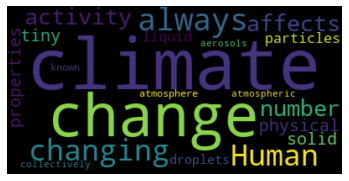

In [133]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

In [26]:
# your code here
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ssl # ugh I have to do this otherwise I get all sorts of ssl errors

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/carlyraskin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlyraskin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/carlyraskin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_final_tweet(tweet):
    tweet = contractions.fix(tweet) # expanding contractions
    word_tokens = word_tokenize(tweet)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in word_tokens if word.lower() not in stop_words]
    return " ".join(lemmatized_words)

climate_feed_df['final_tweet_text'] = climate_feed_df['final_tweet_text'].apply(clean_final_tweet)
print(climate_feed_df.sample(10))

              created_at  \
8506 2019-02-09 21:26:06   
9911 2019-02-09 20:59:22   
8050 2019-02-09 21:35:06   
2337 2019-02-09 23:33:07   
8947 2019-02-09 21:17:18   
8378 2019-02-09 21:28:26   
2217 2019-02-09 23:35:21   
3922 2019-02-09 23:00:43   
5454 2019-02-09 22:27:16   
76   2019-02-10 00:15:48   

                                                                                                                                                                                                                                                                                                                                                          entities  \
8506                                                                                                                              {'hashtags': [{'indices': [39, 54], 'text': 'Plant4Pakistan'}], 'user_mentions': [{'id_str': '122453931', 'name': 'Imran Khan', 'screen_name': 'ImranKhanPTI', 'indices': [3, 16], 'id': 122453931}], 'urls

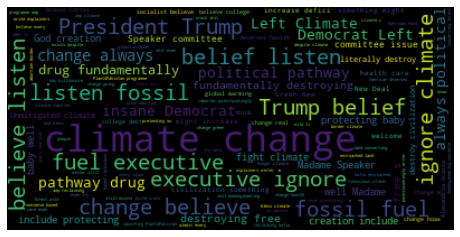

In [42]:
all_words = ' '.join(climate_feed_df['final_tweet_text'].tolist())
wordcloud = WordCloud().generate(all_words)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

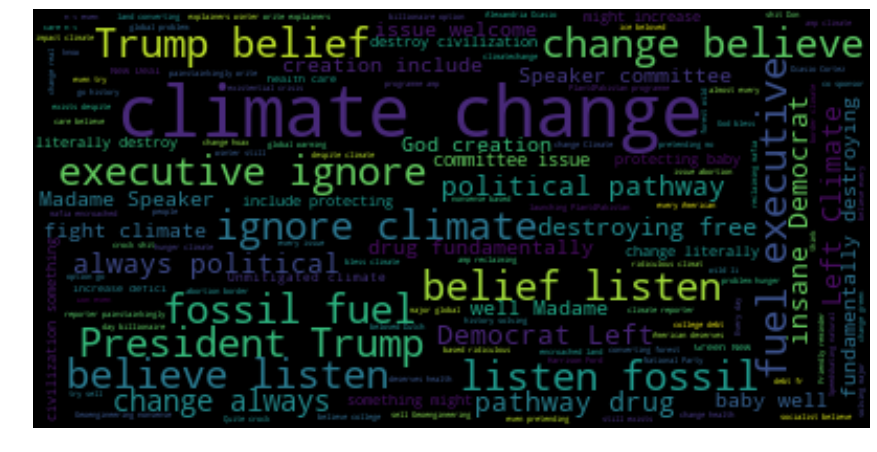

In [69]:

# I have include a sample ooutput. Your output can be different

# Homework ends
# Final thoughts
We did not do all of the cleanup or used all attributes for EDA. Let us highlight one more cleanup activity related to language.

In [72]:
import enchant  # you can use textblog, enchant or any other dictionary

In [73]:
dictionary = enchant.Dict('en')

In [70]:
climate_feed_df['text'].loc[5217]

'去LACMA那么多次，都没意识到旁边的Tar Pits是啥…\n一直以为是摆几个造型给小朋友们玩的公园…\n站在千年前的point看千年后的楼宇车辆，再一想climate change，千年后人类可能也不存在了就觉得——有点兴奋'

In [74]:
[dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]

[False, False, False, False, False]